In [2]:
import numpy as np
import random
from astropy import units as u
from astropy.coordinates import SkyCoord
import scipy
import os
import subprocess
import matplotlib.pylab as plt
%matplotlib inline

os.chdir('/data/des41.a/data/jaortiz/snana-test/do_swaps/')
from make_histograms import make_histogram_vars
from make_histograms import plot_histogram
from make_swaps_arr import make_swaps
from make_swaps_arr import whisker_plot
from parse_dump import findall_KN 
from make_simlib_file import make_simlib

os.chdir('/data/des41.a/data/jaortiz/snana-test/')
from python_all.parse_simlib import parse_simlib
from python_all.python_utilities.des_io import parse_observations

## Execute snana and create histogram plots of time taken until first observation (with scaled y axis)

In [5]:
#move one directory up and execute snana 
os.chdir('/data/des41.a/data/jaortiz/snana-test/')
subprocess.call(["snlc_sim.exe", "SIMGEN_GW170817_AT2017gfo_LSST.INPUT"])

0

In [6]:
simlib = '/data/des41.a/data/jaortiz/snana-test/simlibs/minion_1016_WFD.simlib'

#all_KN variable is use all KN? Takes either 'yes' or 'no'
all_KN = 'yes'
time_taken, KN_locations = make_histogram_vars(simlib, all_KN) 

os.chdir('/data/des41.a/data/jaortiz/snana-test/')



Number of LSST pointings:  2083758
Number of simulations:  11659
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900
4950
5000
5050
5100
5150
5200
5250
5300
5350
5400
5450
5500
5550
5600
5650
5700
5750
5800
5850
5900
5950
6000
6050
6100
6150
6200
6250
6300
6350
6400
6450
6500
6550
6600
6650
6700
6750
6800
6850
6900
6950
7000
7050
7100
7150
7200
7250
7300
7350
7400
7450
7500
7550
7600
7650
7700
7750
7800
7850
7900
7950
8000
8050
8100
8150
8200
8250
8300
8350
8400
8450
8500
8550
8600
8650
8700
8750
8800
8850
8900
8950
9000
9050
9100
9150
9200
9250
9300
9350
9400
9450
9500
955

IOError: [Errno 2] No such file or directory: 'do_swaps/new_pointings_arrays/normal/time_taken.npy'

In [7]:
np.save('do_swaps/new_pointings_arrays/normal/time_taken.npy', time_taken)
np.save('do_swaps/new_pointings_arrays/normal/KN_locations.npy', KN_locations)

fraction_no_obs_nextweek:  0.430740200703


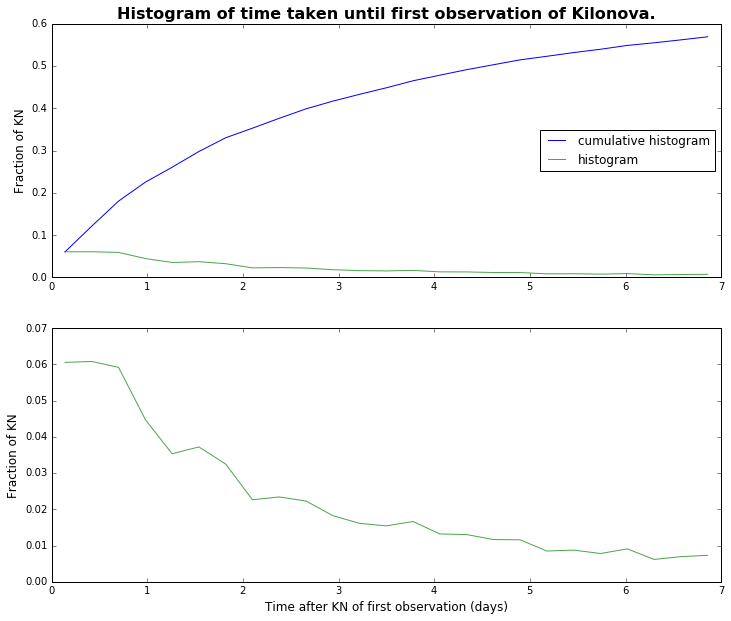

In [25]:
xmax=7
plot_histogram(time_taken, KN_locations, all_KN, xmax)

## Choose variables for swap procedure

In [15]:
#variables
t1 = 2.5 #time period in which we want pointing at KN to occur (days)
t2 = 28 #time period in which we are happy to do compensating swap (days)
max_airmass = 2
max_extra_slew = 70 #in deg

## Carry out swap procedure on each KN used in the simulation

In [16]:
new_pointings_arr, data, no_obs, obs_made, costs = make_swaps(t1, t2, max_airmass, max_extra_slew)
#outputs data, no_obs and obs_made are for plotting

print costs

2.5 28 2 70
Number of simulations:  1697
libid to amend: minion_1016_WFD.simlib
0


Traceback (most recent call last):
  File "/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/default/lib/python2.7/logging/__init__.py", line 874, in emit
    stream.write(fs % msg)
IOError: [Errno 5] Input/output error
Logged from file logger.py, line 220
Traceback (most recent call last):
  File "/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/default/lib/python2.7/logging/__init__.py", line 874, in emit
    stream.write(fs % msg)
IOError: [Errno 5] Input/output error
Logged from file logger.py, line 220
Traceback (most recent call last):
  File "/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/default/lib/python2.7/logging/__init__.py", line 874, in emit
    stream.write(fs % msg)
IOError: [Errno 5] Input/output error
Logged from file logger.py, line 220


extra overhead time is less than zero. New:  0.000442811347219 Old:  0.000599999999395
Problem 0.0 nan
61530.998 [ 61530.713       61530.73383333  61530.75466667  61530.7755
  61530.79633333  61530.81716667  61530.838       61530.85883333
  61530.87966667  61530.9005      61530.92133333  61530.94216667
  61531.5255      61531.54633333  61531.56716667  61531.588       61531.60883333
  61531.62966667  61531.6505      61531.67133333  61531.69216667  61531.713
  61531.73383333  61531.75466667  61531.7755      61531.79633333
  61531.81716667  61531.838       61531.85883333  61531.87966667
  61531.9005      61531.92133333  61531.94216667  61532.5255
  61532.54633333  61532.56716667  61532.588       61532.60883333
  61532.62966667  61532.6505      61532.67133333  61532.69216667  61532.713
  61532.73383333  61532.75466667  61532.7755      61532.79633333
  61532.81716667  61532.838       61532.85883333  61532.87966667
  61532.9005      61532.92133333  61532.94216667]
airmass is  2.12162307064
P

In [17]:
os.chdir('/data/des41.a/data/jaortiz/snana-test/')

np.save('do_swaps/new_pointings_arrays/25_28_2_70/new_pointings_arr', new_pointings_arr)
np.save('do_swaps/new_pointings_arrays/25_28_2_70/data', data)
np.save('do_swaps/new_pointings_arrays/25_28_2_70/no_obs', no_obs)
np.save('do_swaps/new_pointings_arrays/25_28_2_70/obs_made', obs_made)
np.save('do_swaps/new_pointings_arrays/25_28_2_70/costs', costs)


# new_pointings_arr = np.load('do_swaps/new_pointings_arrays/2_28_2_70/new_pointings_arr.npy')
# data = np.load('do_swaps/new_pointings_arrays/2_28_2_70/data.npy')
# no_obs = np.load('do_swaps/new_pointings_arrays/2_28_2_70/no_obs.npy')
# obs_made = np.load('do_swaps/new_pointings_arrays/2_28_2_70/obs_made.npy')

# a = np.load('do_swaps/new_pointings_arrays/1_28_2_70/new_pointings_arr.npy')
# b = np.load('do_swaps/new_pointings_arrays/2_28_2_70/new_pointings_arr.npy')

# c = (a == b)
# print np.argwhere(c==False)

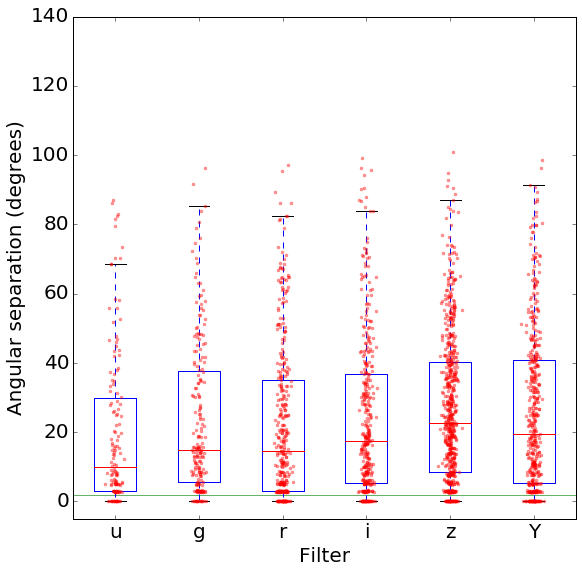

'[ 92.10910027  89.08997341  79.04623038  78.05129085  62.80984647\n  71.43837379]\n[ 1.26940561  1.19221203  2.35869286  2.17857449  2.50450296  2.86473969]'

In [3]:
os.chdir('/data/des41.a/data/jaortiz/snana-test/')


data = np.load('do_swaps/new_pointings_arrays/1_28_2_70/data.npy')
#no_obs = np.load('do_swaps/new_pointings_arrays/4_50_2_110/no_obs.npy')
#obs_made = np.load('do_swaps/new_pointings_arrays/4_50_2_110/obs_made.npy')
t1=2


whisker_plot(data, t1)

"""[ 92.10910027  89.08997341  79.04623038  78.05129085  62.80984647
  71.43837379]
[ 1.26940561  1.19221203  2.35869286  2.17857449  2.50450296  2.86473969]"""

## Create new simlib

In [19]:
new_pointings_arr = np.load('do_swaps/new_pointings_arrays/25_28_2_70/new_pointings_arr.npy')
#Save simlib file under new name for different variables and then change .input file
make_simlib(new_pointings_arr, 'simlibs/new_25_28_2_70.simlib')

## Execute snana with same KN and new simlib.

In [16]:
#move to correct directory up and execute snana with new inputs
os.chdir('/data/des41.a/data/jaortiz/snana-test/')
subprocess.call(["snlc_sim.exe", "new_SIMGEN_GW170817_AT2017gfo_LSST.INPUT"])

KeyboardInterrupt: 

## Process data from snana. Remake histogram plots of time taken until first observation. 


In [13]:
simlib = '/data/des41.a/data/jaortiz/snana-test/simlibs/new_1_28_2_50.simlib'
#all_KN variable is use all KN? Takes either 'yes' or 'no'
all_KN = 'no'
time_taken, KN_locations = make_histogram_vars(simlib, all_KN)

os.chdir('/data/des41.a/data/jaortiz/snana-test/')

np.save('do_swaps/new_pointings_arrays/1_28_2_50/time_taken.npy', time_taken)
np.save('do_swaps/new_pointings_arrays/1_28_2_50/KN_locations.npy', KN_locations)

Number of LSST pointings:  2083758
Number of KN observed by snana:  381
0
50
100
150
200
250
300
350


fraction_no_obs_nextweek:  0.378505875289


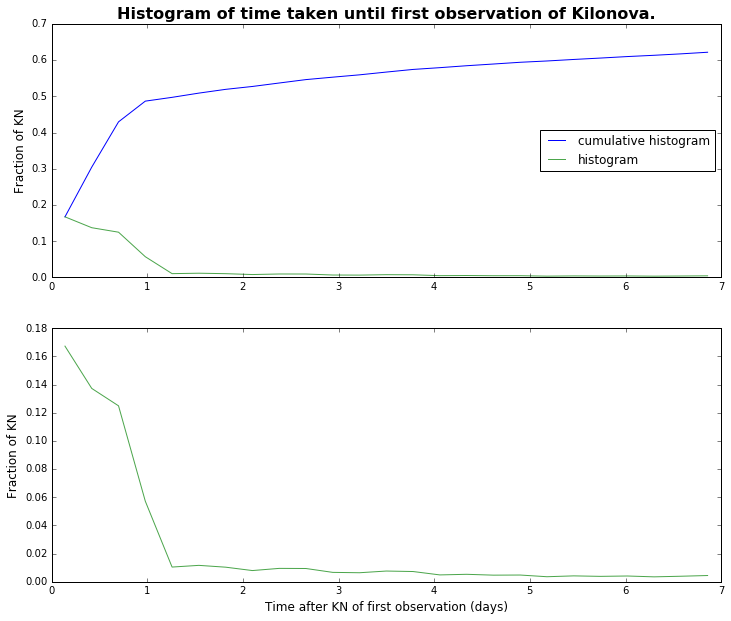

In [21]:

xmax=7
plot_histogram(time_taken1, KN_locations1, all_KN, xmax)